In [153]:
import numpy as np
import pandas as pd

import warnings
warnings.filterwarnings('ignore')

# Loading Dataset

In [154]:
df = pd.read_csv("diamonds.csv")
df.head()

,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75


# EDA

In [155]:
df.rename(columns = {"x": "length", "y": "width", "z": "depth", "depth": "depth_%"}, inplace = True)

In [156]:
df.shape

(53940, 10)

In [157]:
df.columns

Index(['carat', 'cut', 'color', 'clarity', 'depth_%', 'table', 'price',
       'length', 'width', 'depth'],
      dtype='object')

In [158]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 53940 entries, 0 to 53939
Data columns (total 10 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   carat    53940 non-null  float64
 1   cut      53940 non-null  object 
 2   color    53940 non-null  object 
 3   clarity  53940 non-null  object 
 4   depth_%  53940 non-null  float64
 5   table    53940 non-null  float64
 6   price    53940 non-null  int64  
 7   length   53940 non-null  float64
 8   width    53940 non-null  float64
 9   depth    53940 non-null  float64
dtypes: float64(6), int64(1), object(3)
memory usage: 4.1+ MB


In [159]:
df.describe()

,carat,depth_%,table,price,length,width,depth
count,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000
mean,0.797940,61.749405,57.457184,3932.799722,5.731157,5.734526,3.538734
std,0.474011,1.432621,2.234491,3989.439738,1.121761,1.142135,0.705699
min,0.200000,43.000000,43.000000,326.000000,0.000000,0.000000,0.000000
25%,0.400000,61.000000,56.000000,950.000000,4.710000,4.720000,2.910000
50%,0.700000,61.800000,57.000000,2401.000000,5.700000,5.710000,3.530000
75%,1.040000,62.500000,59.000000,5324.250000,6.540000,6.540000,4.040000
max,5.010000,79.000000,95.000000,18823.000000,10.740000,58.900000,31.800000


In [160]:
df.isna().sum()

carat      0
cut        0
color      0
clarity    0
depth_%    0
table      0
price      0
length     0
width      0
depth      0
dtype: int64

In [161]:
df[["length", "width", "depth"]][(df["length"] == 0) | (df["width"] == 0) | (df["depth"] == 0)]

,length,width,depth
2207,6.55,6.48,0.0
2314,6.66,6.60,0.0
4791,6.50,6.47,0.0
5471,6.50,6.47,0.0
10167,7.15,7.04,0.0
11182,0.00,6.62,0.0
11963,0.00,0.00,0.0
13601,6.88,6.83,0.0
15951,0.00,0.00,0.0
24394,8.49,8.45,0.0


In [162]:
# replace "0" with np.nan datatype
df[["length", "width", "depth"]] = df[["length", "width", "depth"]].replace(0, np.nan)

In [163]:
df.isna().sum()

carat       0
cut         0
color       0
clarity     0
depth_%     0
table       0
price       0
length      8
width       7
depth      20
dtype: int64

In [164]:
df.dropna(inplace = True)

In [165]:
df.isna().sum()

carat      0
cut        0
color      0
clarity    0
depth_%    0
table      0
price      0
length     0
width      0
depth      0
dtype: int64

In [166]:
df.shape

(53920, 10)

#### Univariate - Categorical

In [167]:
df.cut.value_counts()

Ideal        21548
Premium      13780
Very Good    12081
Good          4902
Fair          1609
Name: cut, dtype: int64

In [168]:
df.color.value_counts()

G    11284
E     9797
F     9538
H     8298
D     6774
I     5421
J     2808
Name: color, dtype: int64

In [169]:
df.clarity.value_counts()

SI1     13063
VS2     12254
SI2      9185
VS1      8170
VVS2     5066
VVS1     3654
IF       1790
I1        738
Name: clarity, dtype: int64

#### Univariate - Numerical

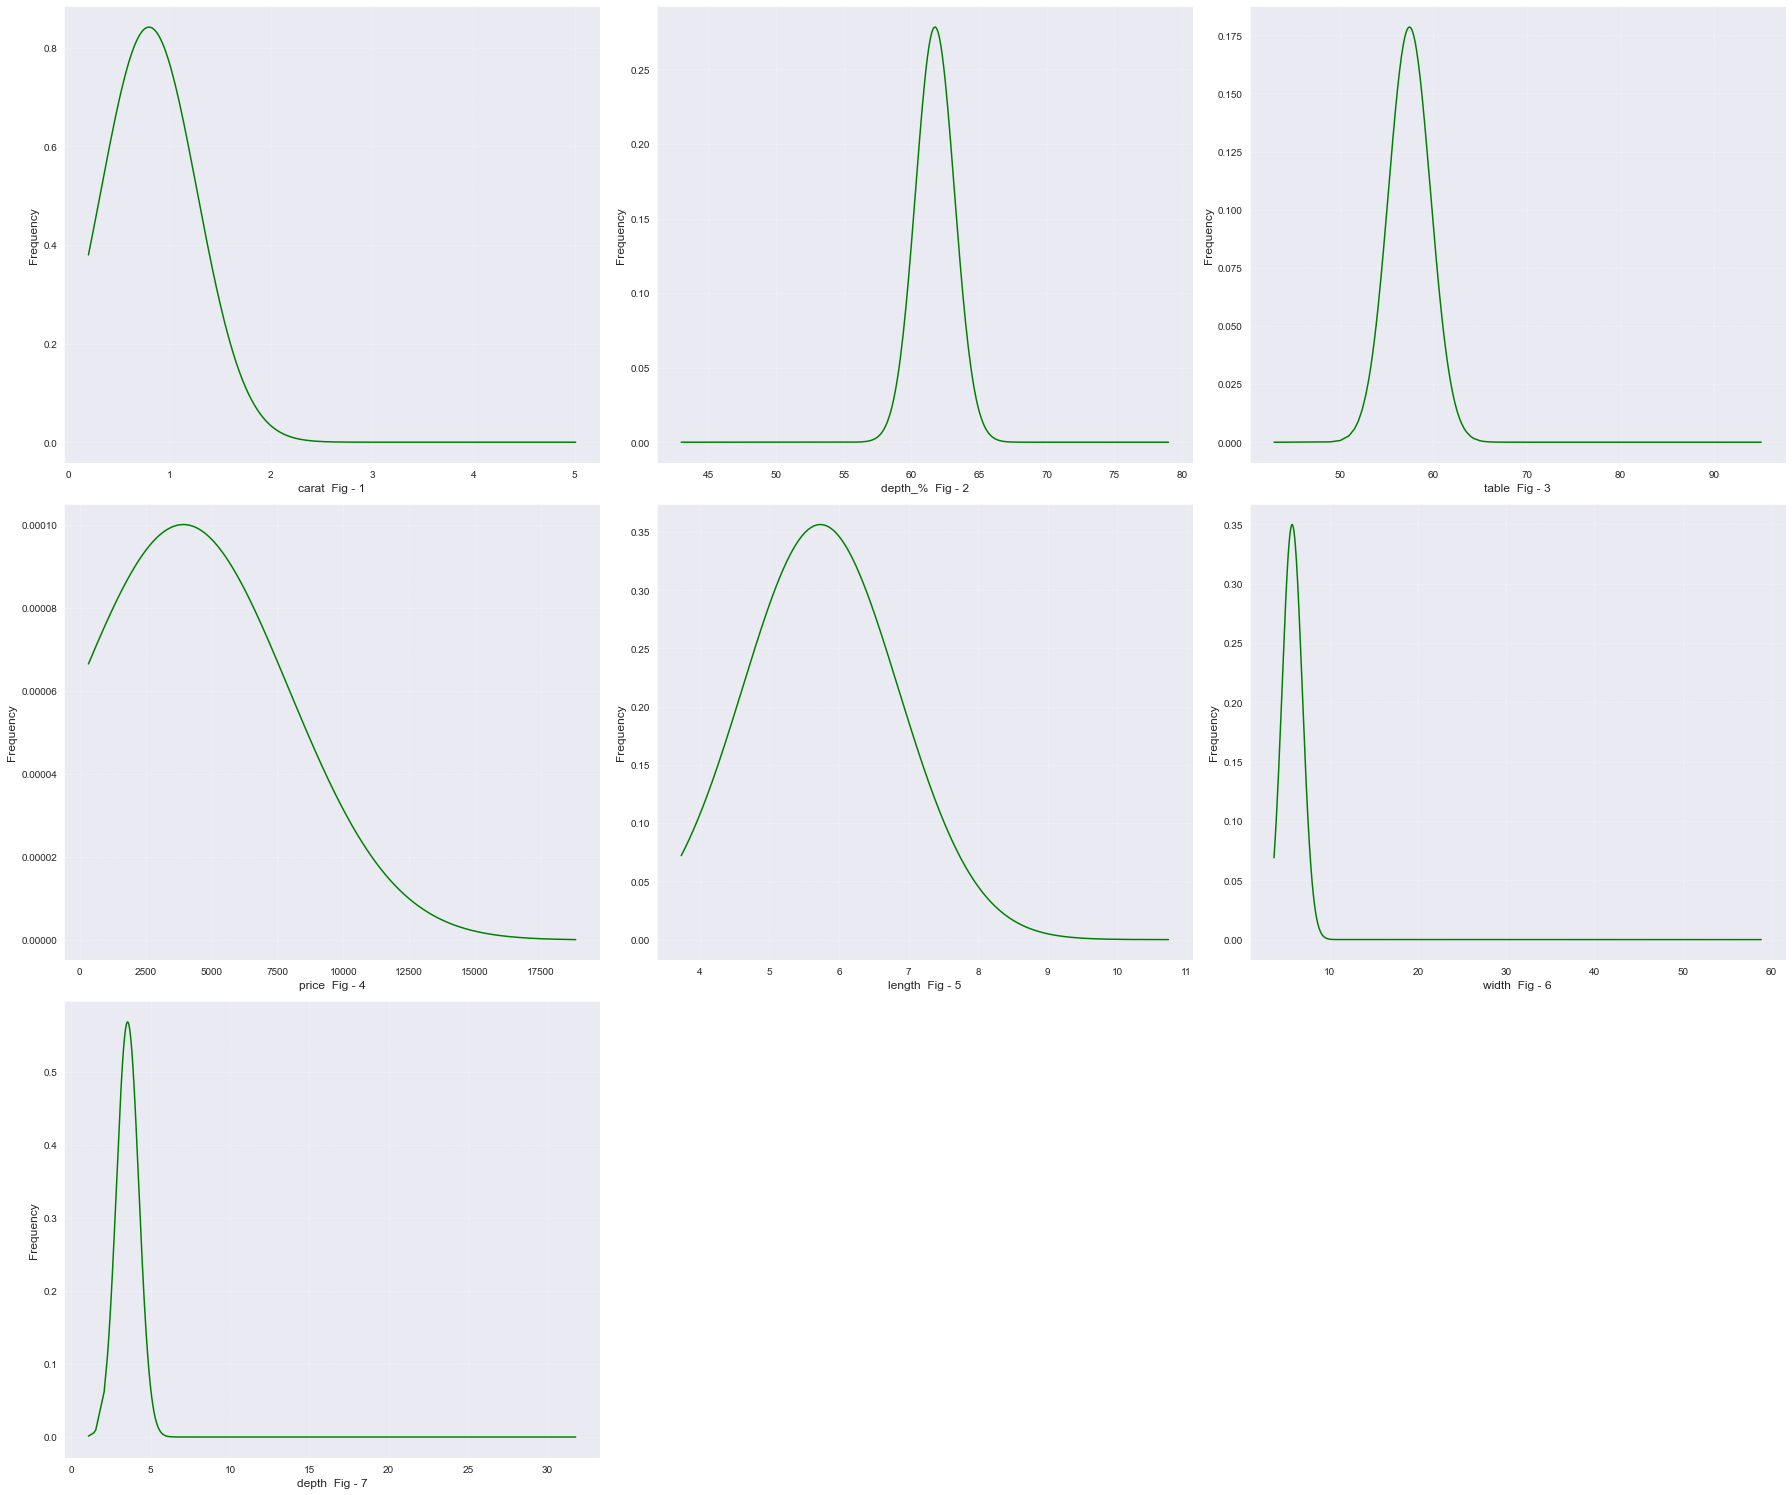

In [170]:
import matplotlib.pyplot as plt, seaborn as sns
import scipy.stats as stats
plt.figure(figsize = (25, 55))

for i, col, in enumerate(df.describe().columns, 1):
    plt.subplot(8, 3, i)
    t = col + "  Fig - " + str(i)
    pdf = stats.norm.pdf(df[col].sort_values(), np.mean(df[col]), np.std(df[col]))
    plt.plot(df[col].sort_values(), pdf, color = 'g')
    plt.xlabel(t, size=12)    
    plt.ylabel("Frequency", size=12)                
    plt.grid(True, alpha=0.3, linestyle="--")
plt.tight_layout()
plt.show()

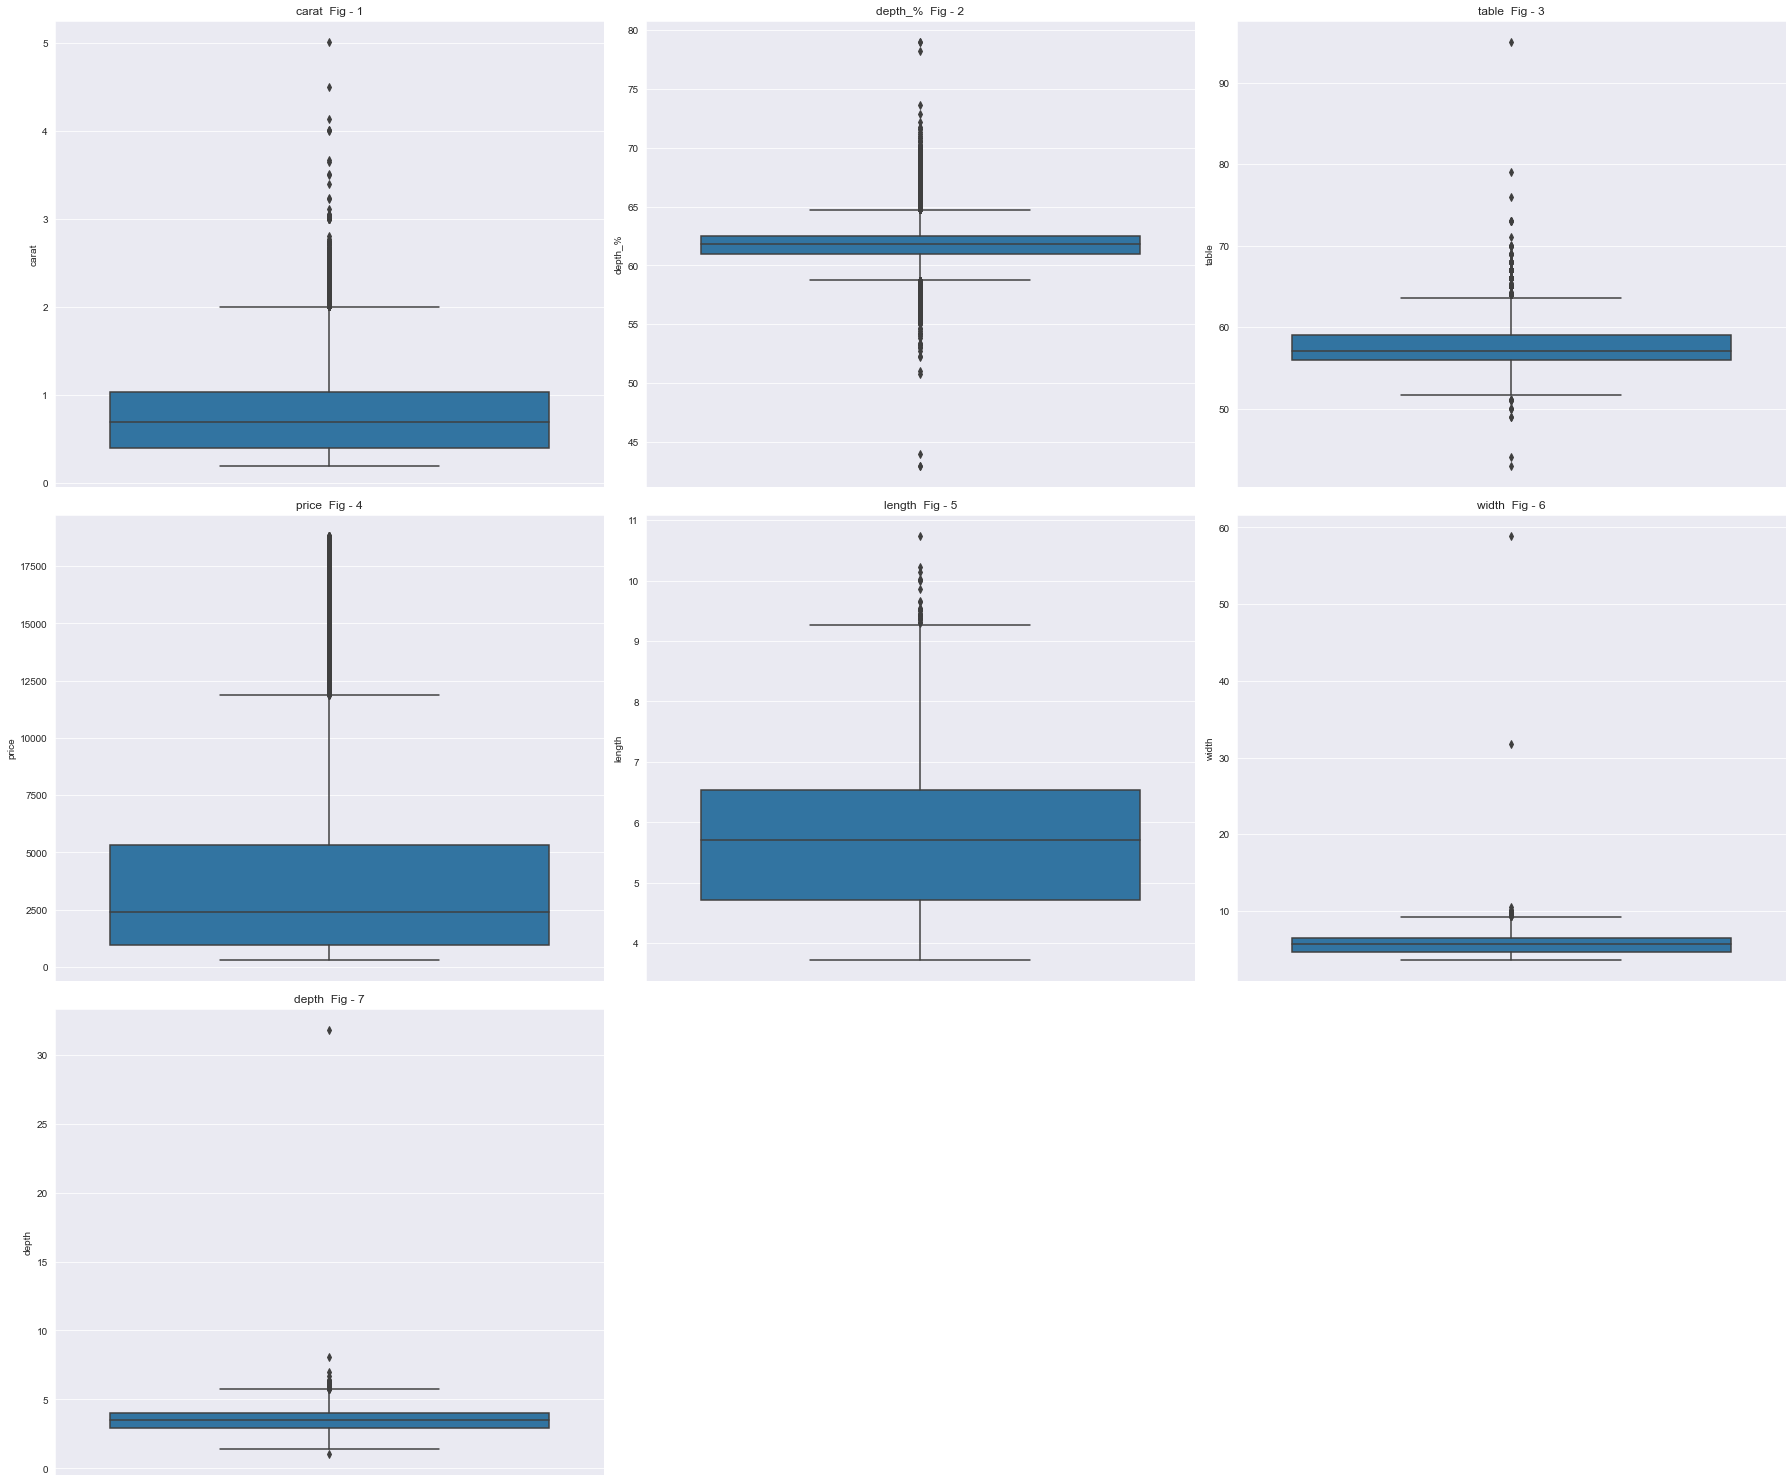

In [171]:
plt.figure(figsize = (25, 55))

for i, col, in enumerate(df.describe().columns, 1):
    plt.subplot(8, 3, i)
    t = col + "  Fig - " + str(i)
    sns.boxplot(y = df[col]).set(title = t)
plt.tight_layout()
plt.show()

#### Bivariate - Numerical:Numerical

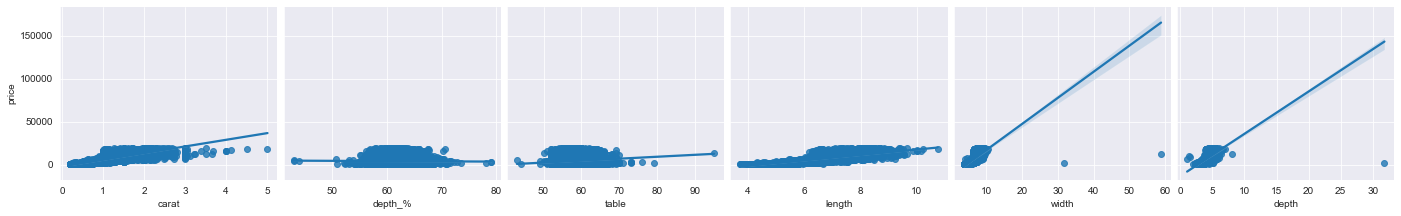

In [172]:
sns.pairplot(data = df, x_vars = ["carat", "depth_%", "table", "length", "width", "depth"], y_vars = ["price"], kind = "reg", height = 3, aspect = 1.1)

<AxesSubplot:>

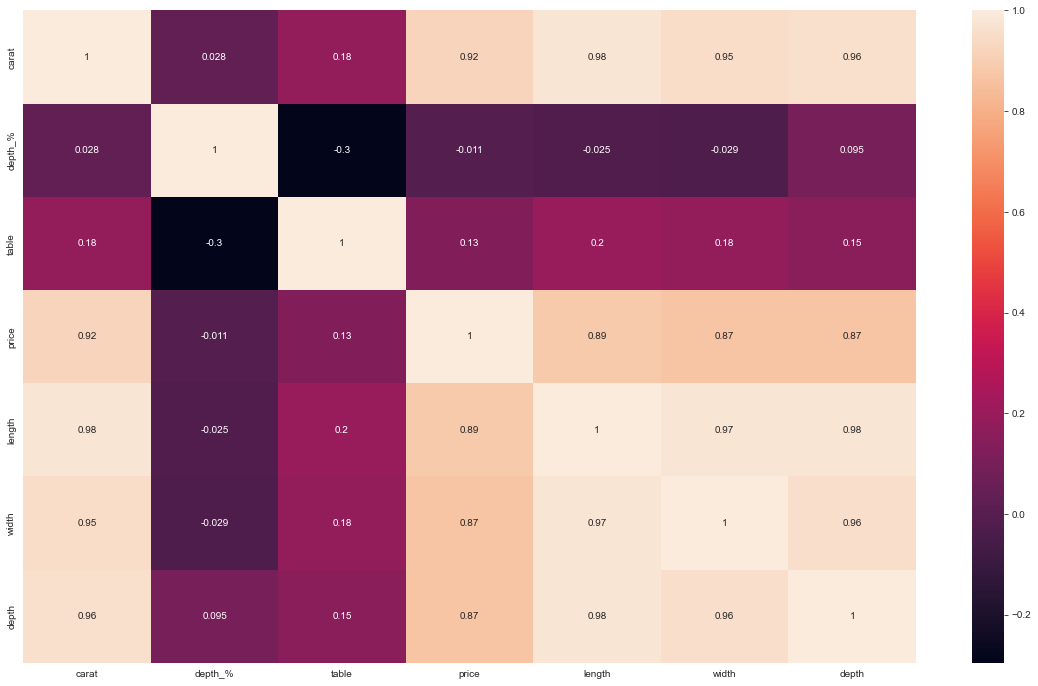

In [173]:
# below we can see carat > length > width >= height are correlated to price (from highest to lowest)
plt.figure(figsize = (20, 12))

sns.heatmap(df.corr(), annot = True)

#### Bivariate - Numerical:Categorical

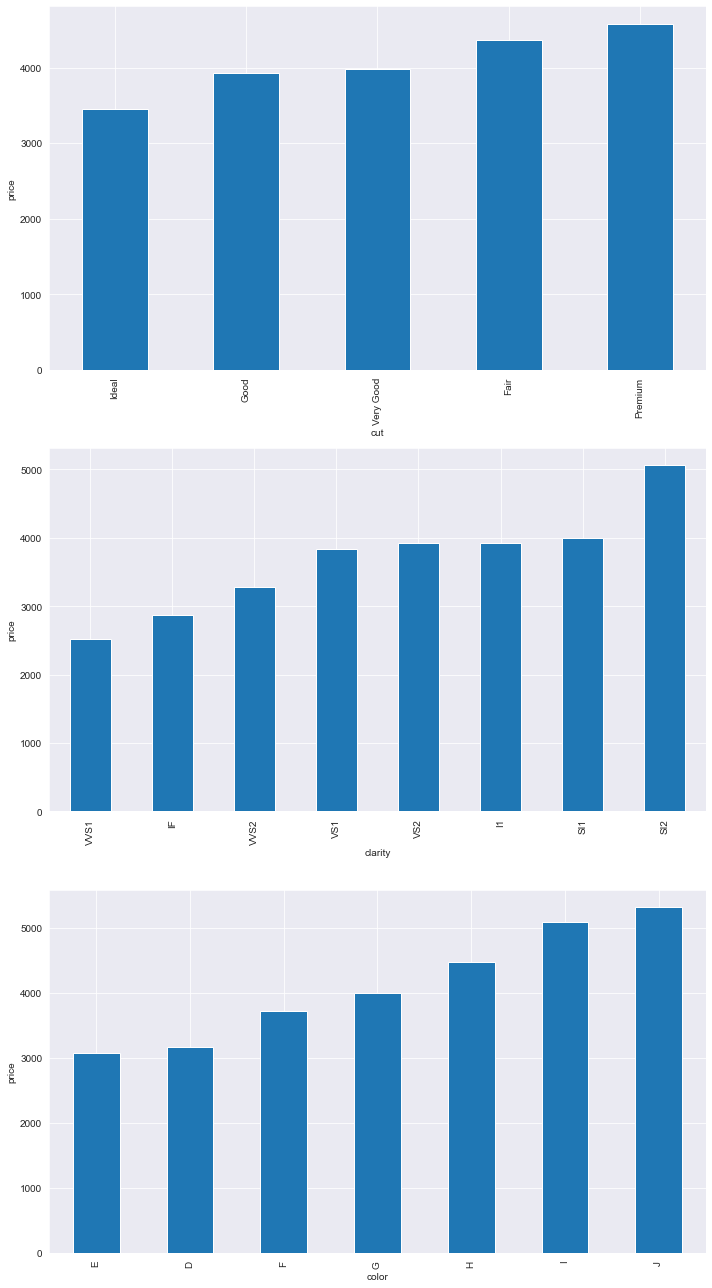

In [174]:
# from above we now have [cut, clarity, color, carat, length, width, height, price] left for analysis after removing depth_% and table
# cut -> price, clarity -> price, color -> price
plt.figure(figsize = (10, 18))

for i, cols in enumerate(["cut", "clarity", "color"], 1):
    plt.subplot(3, 1, i)
    df.groupby(cols)["price"].mean().sort_values().plot.bar()
    plt.ylabel("price")

plt.tight_layout()
plt.show()

#### Handling outliers

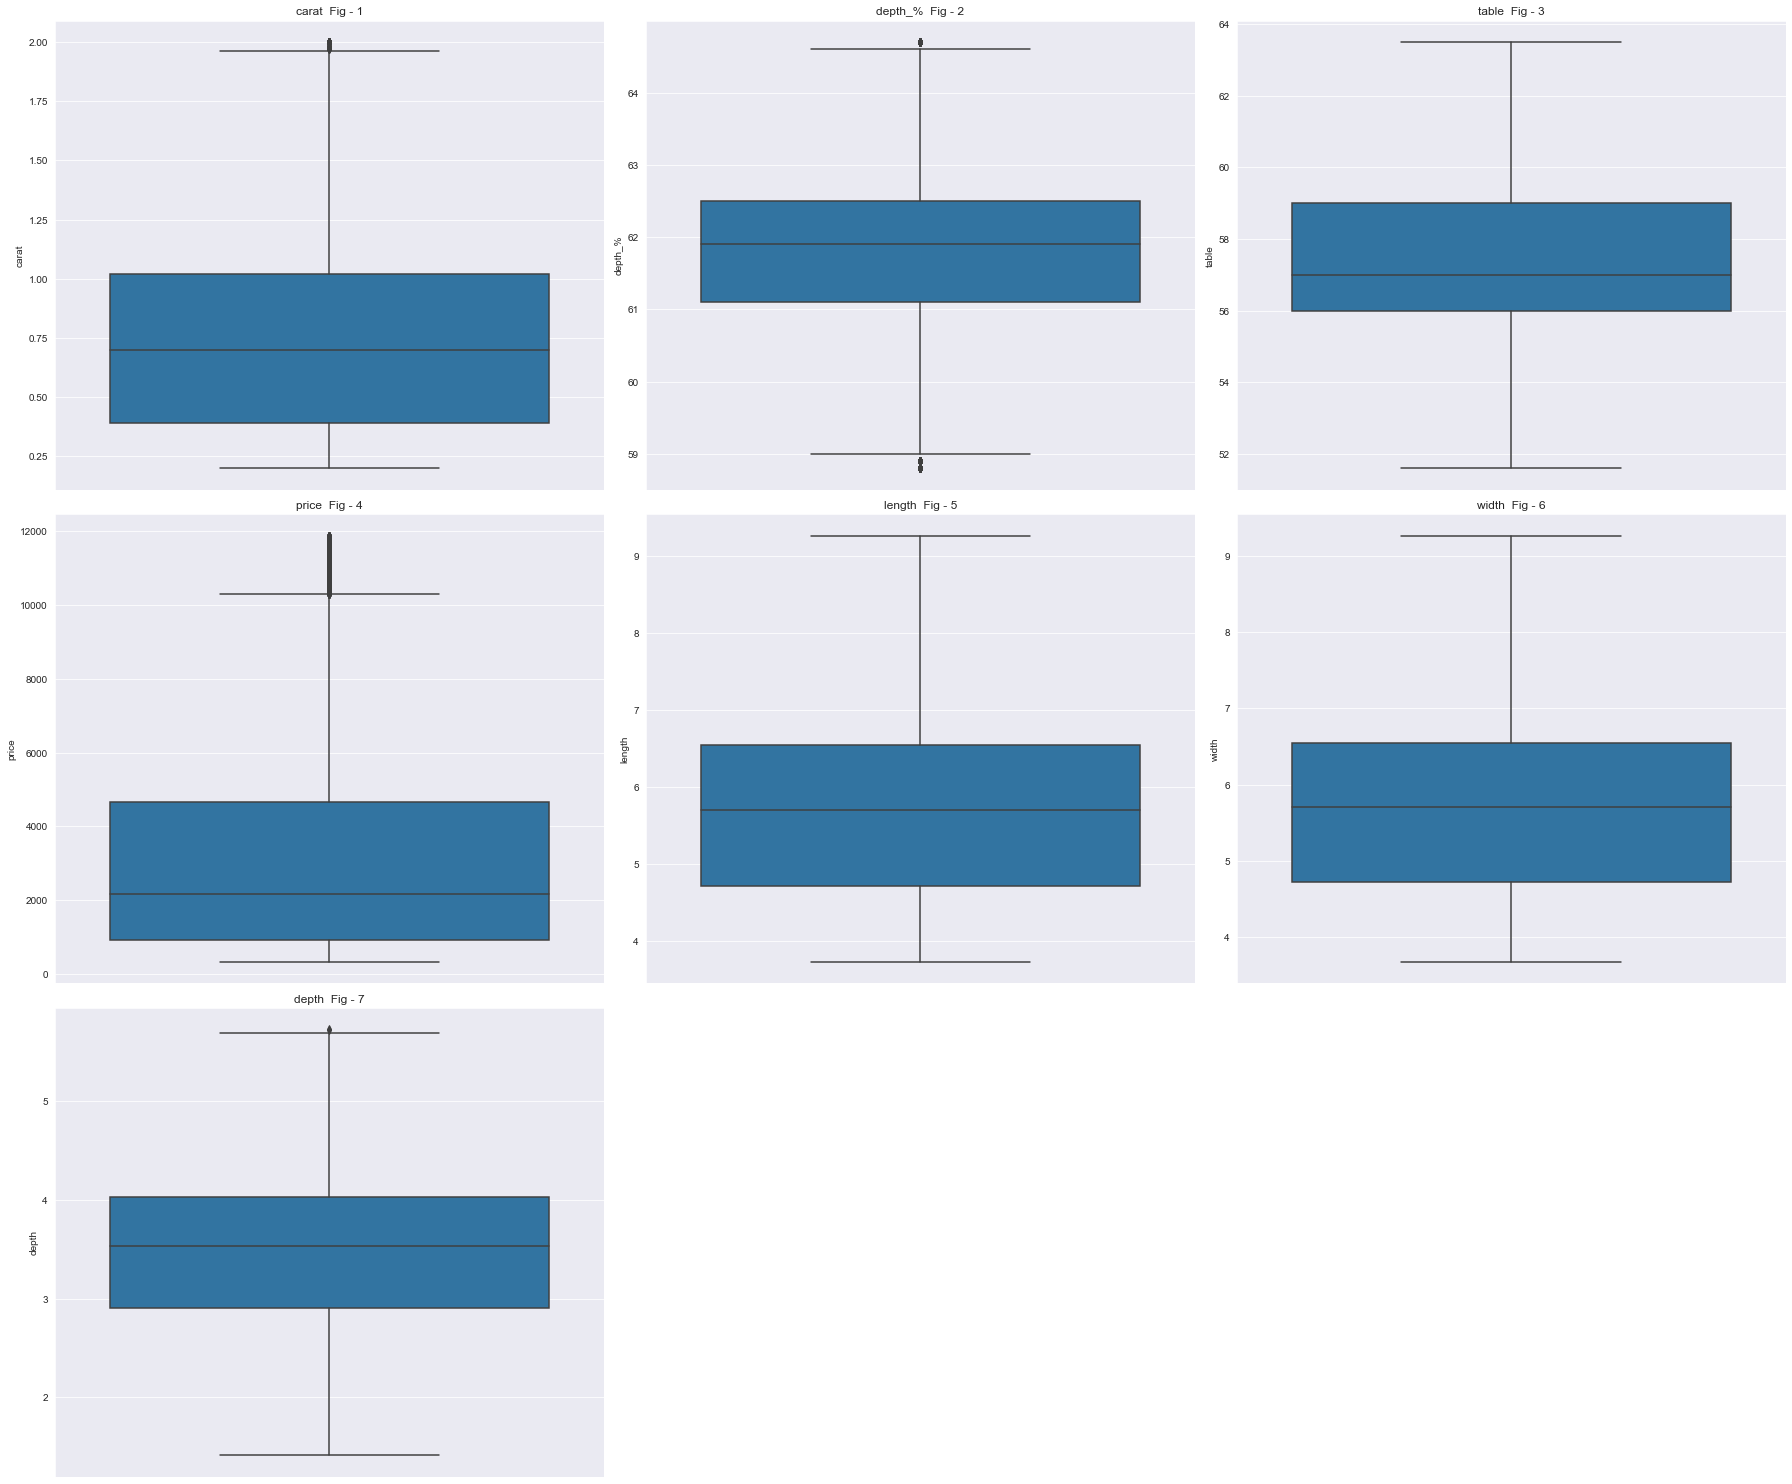

In [175]:
# detecting outliers with inter-quantile-range (IQR)
outliers = list()
def get_outliers(df, col):
    
    sorted(col) # sorting columns to get 25th and 75th percentile (like we do in median which is 50th percentile)
    Q1,Q3 = np.percentile(col , [25,75])
    IQR = Q3 - Q1
    lower = Q1 - (1.5 * IQR)
    upper = Q3 + (1.5 * IQR)

    return lower, upper

plt.figure(figsize = (25, 55))

for i, col, in enumerate(df.describe().columns, 1):
    plt.subplot(8, 3, i)
    title = col + "  Fig - " + str(i)
    l, u = get_outliers(df, df[col])
    t = df[(df[col] < l) | (df[col] > u)]
    df_o = df.drop(t.index)
    sns.boxplot(y = df_o[col]).set(title = title)
plt.tight_layout()
plt.show()

In [176]:
df_o.corr()

,carat,depth_%,table,price,length,width,depth
carat,1.000000,0.023728,0.182577,0.923195,0.978860,0.972742,0.977318
depth_%,0.023728,1.000000,-0.296064,-0.012985,-0.027922,-0.030846,0.093720
table,0.182577,-0.296064,1.000000,0.127213,0.196413,0.188777,0.156187
price,0.923195,-0.012985,0.127213,1.000000,0.887008,0.883874,0.882015
length,0.978860,-0.027922,0.196413,0.887008,1.000000,0.993340,0.991198
width,0.972742,-0.030846,0.188777,0.883874,0.993340,1.000000,0.986840
depth,0.977318,0.093720,0.156187,0.882015,0.991198,0.986840,1.000000


<AxesSubplot:>

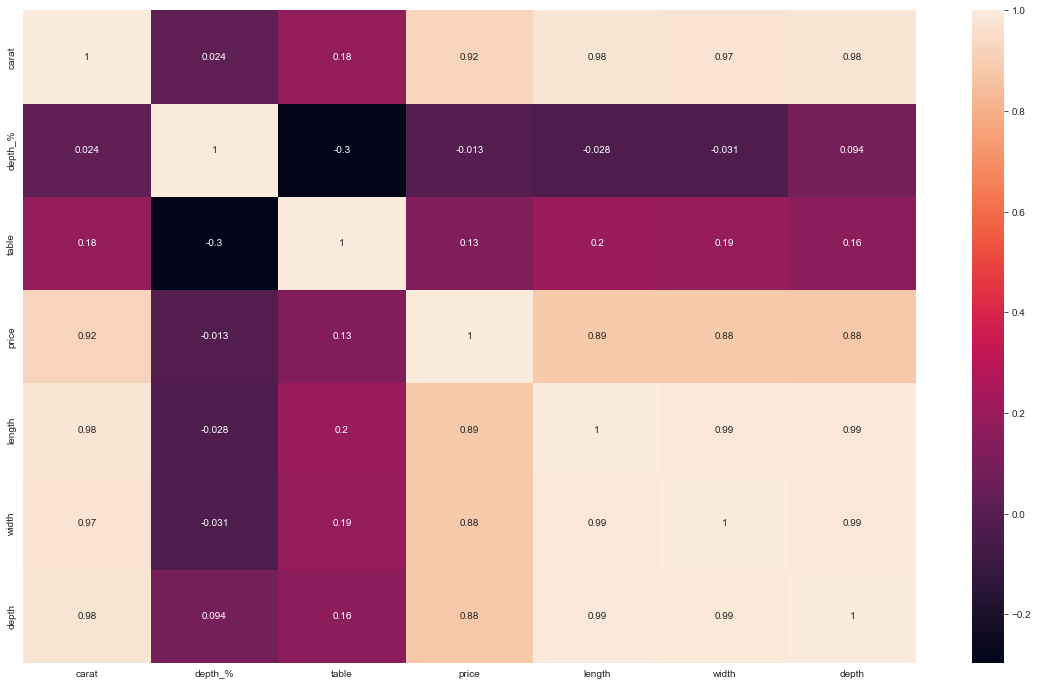

In [177]:
# below we can see carat > length > width >= height are correlated to price (from highest to lowest), after removal of outliers
plt.figure(figsize = (20, 12))

sns.heatmap(df_o.corr(), annot = True)

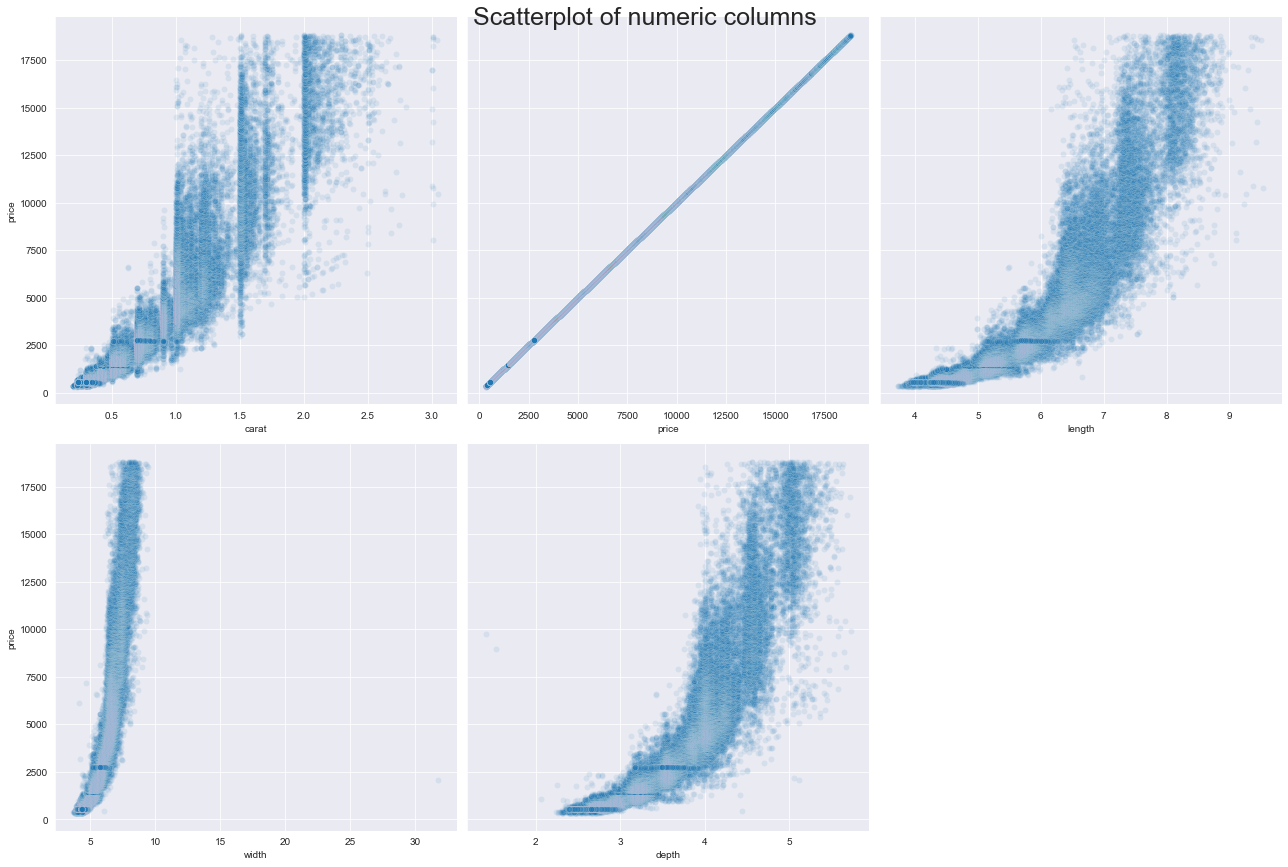

In [178]:
# plotting scatter plots
# Only plotting numeric columns against our response variable

sns.set_style("darkgrid")

numeric_cols = df_o[df_o.describe().columns].drop(["table", "depth_%"], axis = 1)
g = sns.FacetGrid(pd.DataFrame(numeric_cols.columns), col = 0, col_wrap = 3, sharex = False, size = 6)
for ax, feature_col in zip(g.axes, numeric_cols):
    sns.scatterplot(data = numeric_cols, x = feature_col, y = "price", ax = ax, alpha = 0.1)

g.tight_layout()
plt.suptitle("Scatterplot of numeric columns", fontsize = 25, y = 1)

plt.show()

# Splitting the data

In [179]:
df.describe()

,carat,depth_%,table,price,length,width,depth
count,53920.000000,53920.000000,53920.000000,53920.000000,53920.000000,53920.000000,53920.000000
mean,0.797698,61.749514,57.456834,3930.993231,5.731627,5.734887,3.540046
std,0.473795,1.432331,2.234064,3987.280446,1.119423,1.140126,0.702530
min,0.200000,43.000000,43.000000,326.000000,3.730000,3.680000,1.070000
25%,0.400000,61.000000,56.000000,949.000000,4.710000,4.720000,2.910000
50%,0.700000,61.800000,57.000000,2401.000000,5.700000,5.710000,3.530000
75%,1.040000,62.500000,59.000000,5323.250000,6.540000,6.540000,4.040000
max,5.010000,79.000000,95.000000,18823.000000,10.740000,58.900000,31.800000


In [180]:
from sklearn.model_selection import train_test_split
X = df_o.drop(["table", "depth_%", "price"], axis = 1)
y = df_o["price"]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 8)
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((40418, 7), (13473, 7), (40418,), (13473,))

# Encoding (Data-Preprocessing)

In [182]:
# pre-processing train-data
from sklearn.preprocessing import LabelEncoder

cut_encoder = LabelEncoder()
color_encoder = LabelEncoder()
clarity_encoder = LabelEncoder()

X_train['cut'] = cut_encoder.fit_transform(X_train['cut'])
X_train['color'] = color_encoder.fit_transform(X_train['color'])
X_train['clarity'] = clarity_encoder.fit_transform(X_train['clarity'])

print(X_train.head())

       carat  cut  color  clarity  length  width  depth
24155   2.02    2      4        2    8.11   8.06   5.04
9067    1.02    4      4        2    6.55   6.61   3.84
25693   0.40    2      1        3    4.68   4.71   2.94
40139   0.70    0      3        0    5.64   5.48   3.60
41215   0.40    2      2        6    4.77   4.73   2.92


#### Reason to opt LabelEncoder(): 

It's viable to apply LabelEncoder than One-Hot-Encoding because we are dealing with ordinal qualitative data-type not nominal data-type.

In [186]:
# pre-processing test-data
X_test['cut'] = cut_encoder.transform(X_test['cut'])
X_test['color'] = color_encoder.transform(X_test['color'])
X_test['clarity'] = clarity_encoder.transform(X_test['clarity'])

print(X_test.head())

       carat  cut  color  clarity  length  width  depth
38082   0.36    2      1        5    4.63   4.59   2.82
40906   0.55    4      6        5    5.23   5.29   3.31
13760   1.20    4      3        3    6.68   6.79   4.25
51852   0.70    2      0        3    5.77   5.73   3.47
48908   0.54    2      3        6    5.25   5.27   3.23


# Scaling (Data-Preprocessing)

In [187]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train_rescaled = pd.DataFrame(scaler.fit_transform(X_train), columns = X_train.columns, index = X_train.index)

In [188]:
X_test_rescaled = pd.DataFrame(scaler.transform(X_test), columns = X_test.columns, index = X_test.index)

# Model Building

#### Linear Regression

In [189]:
from sklearn.linear_model import LinearRegression
linear_regression = LinearRegression()
linear_regression.fit(X_train_rescaled, y_train)

LinearRegression()

In [190]:
y_pred_lr = linear_regression.predict(X_test_rescaled)

In [191]:
# evaluation metrics
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error

print("Accuracy - Train : ", linear_regression.score(X_train_rescaled, y_train))
print("Accuracy - Test : ", linear_regression.score(X_test_rescaled, y_test))
print("R2 Score : ", r2_score(y_test, y_pred_lr))
print("MAE : ", mean_absolute_error(y_test, y_pred_lr))
print("MSE : ", mean_squared_error(y_test, y_pred_lr))
print("RMSE : ", np.sqrt(mean_squared_error(y_test, y_pred_lr)))

Accuracy - Train :  0.8881665039181849
Accuracy - Test :  0.8895816341185849
R2 Score :  0.8895816341185849
MAE :  844.0276981976418
MSE :  1759583.5005241642
RMSE :  1326.4929327079599


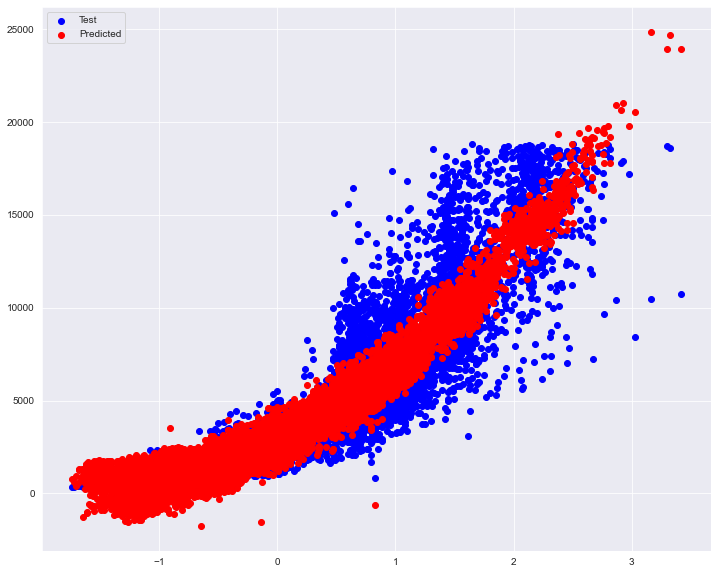

In [192]:
plt.figure(figsize = (12, 10))

plt.scatter(X_test_rescaled["length"], y_test, color = "blue", label = "Test")
plt.scatter(X_test_rescaled["length"], y_pred_lr, color = "red", label = "Predicted")
plt.legend()
plt.show()

#### KNN

In [193]:
from sklearn.neighbors import KNeighborsRegressor

knn = KNeighborsRegressor()
knn.fit(X_train_rescaled, y_train);

In [194]:
y_pred_knn = knn.predict(X_test_rescaled)

In [195]:
# evaluation metrics

print("Accuracy - Train : ", knn.score(X_train_rescaled, y_train))
print("Accuracy - Test : ", knn.score(X_test_rescaled, y_test))
print("R2 Score : ", r2_score(y_test, y_pred_knn))
print("MAE : ", mean_absolute_error(y_test, y_pred_knn))
print("MSE : ", mean_squared_error(y_test, y_pred_knn))
print("RMSE : ", np.sqrt(mean_squared_error(y_test, y_pred_knn)))

Accuracy - Train :  0.9840869837915383
Accuracy - Test :  0.976089989076967
R2 Score :  0.976089989076967
MAE :  307.6488087285682
MSE :  381020.4976471461
RMSE :  617.2685782114186


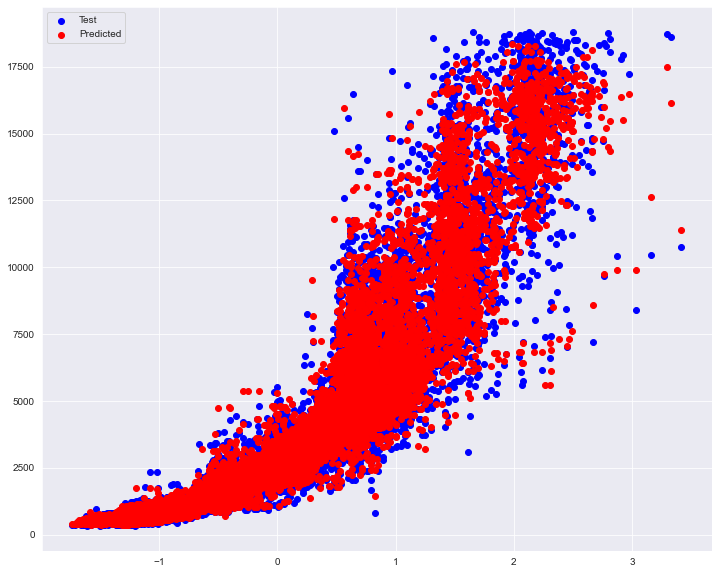

In [196]:
plt.figure(figsize = (12, 10))

plt.scatter(X_test_rescaled["length"], y_test, color = "blue", label = "Test")
plt.scatter(X_test_rescaled["length"], y_pred_knn, color = "red", label = "Predicted")
plt.legend()
plt.show()

#### Decision Tree

In [197]:
from sklearn.tree import DecisionTreeRegressor

dt = DecisionTreeRegressor()
dt.fit(X_train_rescaled, y_train)

DecisionTreeRegressor()

In [198]:
y_pred_dt = dt.predict(X_test_rescaled)

In [199]:
# evaluation metrics

print("Accuracy - Train : ", dt.score(X_train_rescaled, y_train))
print("Accuracy - Test : ", dt.score(X_test_rescaled, y_test))
print("R2 Score : ", r2_score(y_test, y_pred_dt))
print("MAE : ", mean_absolute_error(y_test, y_pred_dt))
print("MSE : ", mean_squared_error(y_test, y_pred_dt))
print("RMSE : ", np.sqrt(mean_squared_error(y_test, y_pred_dt)))

Accuracy - Train :  0.9999888037708211
Accuracy - Test :  0.9645955346063696
R2 Score :  0.9645955346063696
MAE :  368.34373685642885
MSE :  564191.5876423629
RMSE :  751.1268785247689


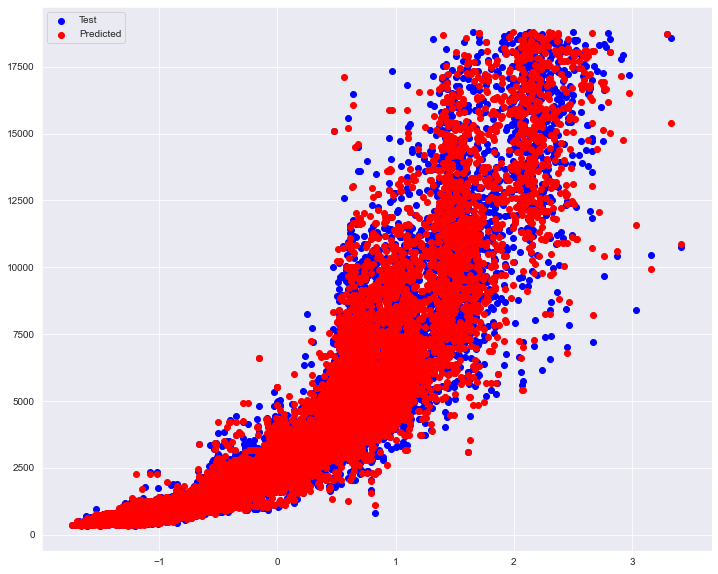

In [200]:
plt.figure(figsize = (12, 10))

plt.scatter(X_test_rescaled["length"], y_test, color = "blue", label = "Test")
plt.scatter(X_test_rescaled["length"], y_pred_dt, color = "red", label = "Predicted")
plt.legend()
plt.show()

#### Random Forest

In [201]:
from sklearn.ensemble import RandomForestRegressor

rf = RandomForestRegressor()
rf.fit(X_train_rescaled, y_train)

RandomForestRegressor()

In [202]:
y_pred_rf = rf.predict(X_test_rescaled)

In [203]:
# evaluation metrics

print("Accuracy - Train : ", rf.score(X_train_rescaled, y_train))
print("Accuracy - Test : ", rf.score(X_test_rescaled, y_test))
print("R2 Score : ", r2_score(y_test, y_pred_rf))
print("MAE : ", mean_absolute_error(y_test, y_pred_rf))
print("MSE : ", mean_squared_error(y_test, y_pred_rf))
print("RMSE : ", np.sqrt(mean_squared_error(y_test, y_pred_rf)))

Accuracy - Train :  0.9973685237767608
Accuracy - Test :  0.9805779952650336
R2 Score :  0.9805779952650336
MAE :  278.16028055405343
MSE :  309501.40228892054
RMSE :  556.3285021360316


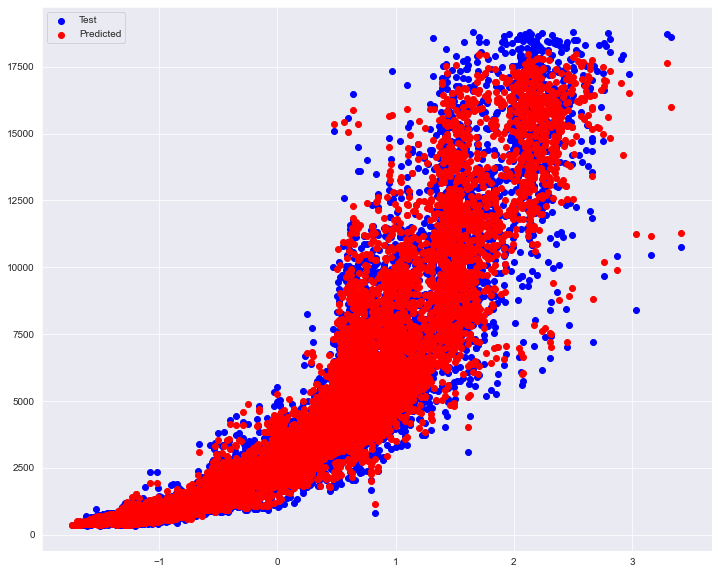

In [204]:
plt.figure(figsize = (12, 10))

plt.scatter(X_test_rescaled["length"], y_test, color = "blue", label = "Test")
plt.scatter(X_test_rescaled["length"], y_pred_rf, color = "red", label = "Predicted")
plt.legend()
plt.show()

# Model Serializing

In [205]:
from pickle import dump

dump(cut_encoder, open("models/Cut_LabelEncoder.pkl", "wb"))
dump(color_encoder, open("models/Color_LabelEncoder.pkl", "wb"))
dump(clarity_encoder, open("models/Clarity_LabelEncoder.pkl", "wb"))

dump(scaler, open("models/StandardScaler.pkl", "wb"))
dump(linear_regression, open("models/LinearRegression.pkl", "wb"))
dump(knn, open("models/KNeighborsRegressor.pkl", "wb"))
dump(dt, open("models/DecisionTreeRegressor.pkl", "wb"))
dump(rf, open("models/RandomForestRegressor.pkl", "wb"))